In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 458.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 898.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 10.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 40.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 21.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

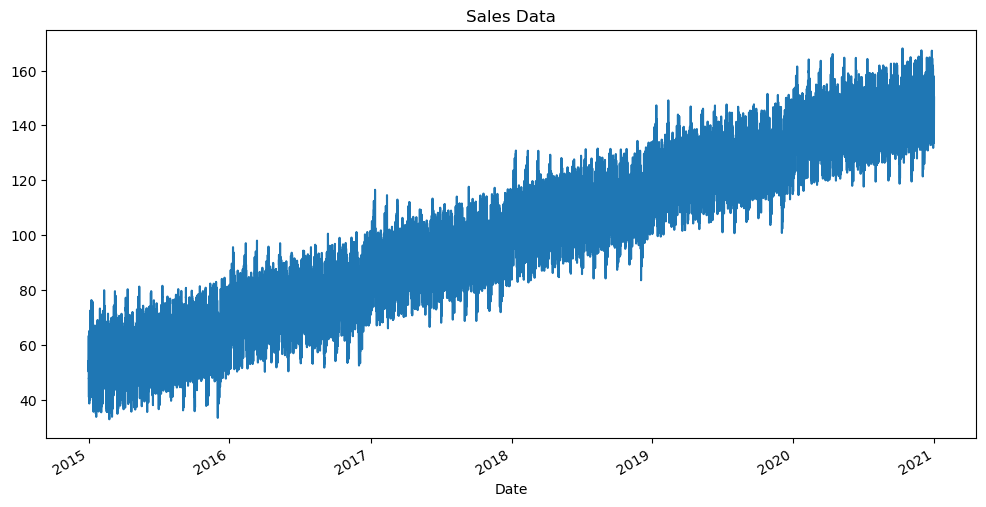

ADF Statistic: -2.9457383345048975
p-value: 0.04028193909500527
Critical Value (1%): -3.4304745025245373
Critical Value (5%): -2.861595027617222
Critical Value (10%): -2.5667992893705645


In [ ]:

# Load data
data = pd.read_csv('retail_sales.csv', parse_dates=['Date'], index_col='Date')

# Plot the data
data['Sales'].plot(figsize=(12, 6))
plt.title('Sales Data')
plt.show()

# Perform ADF test
result = adfuller(data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')



- The results of the Augmented Dickey-Fuller (ADF) test suggest that the **time series is stationary**, as the ADF statistic is less than the critical values at the 5% and 10% levels, and the p-value is below 0.05. This means we can reject the null hypothesis of the presence of a unit root (i.e., non-stationarity) at the 5% significance level.

- Given this result, we can proceed with fitting the **SARIMA model**. We will use the previously described process to determine the best orders for SARIMA, then fit the model and evaluate its performance. After that, we will consider ensembling multiple models to improve the prediction quality.

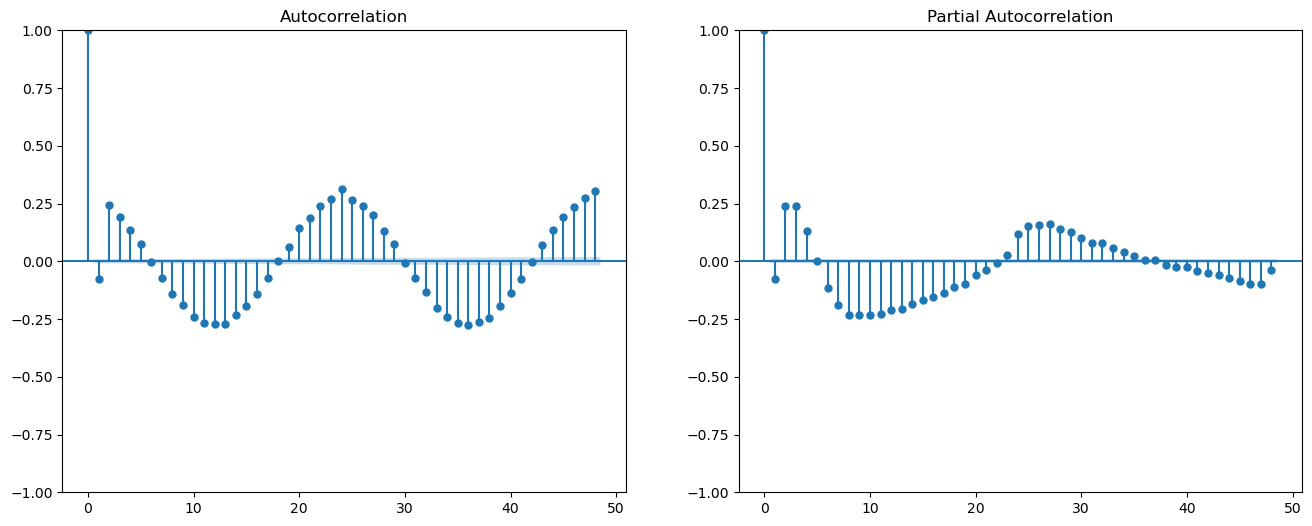

In [ ]:


# Differencing if needed
data_diff = data['Sales'].diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()


**Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the differenced sales data:**
- ACF (Autocorrelation Function) Plot:
  1.  The ACF plot exhibits a sinusoidal oscillating pattern, indicating the presence of ***seasonality*** in the data.
  2. After the initial few lags, the correlation quickly drops and **oscillates around zero**, suggesting that the data might be ***stationary after differencing***.
- PACF (Partial Autocorrelation Function) Plot:
  1. The PACF values also diminish after the first few lags, further indicating ***that higher lags do not add significant predictive*** value beyond what is already explained by the first few lags


- ***Interpretation:*** so we have observed **Seasonality and Stationarity**

- ***Model Identification:***
  1.  ***ARIMA Model:*** Given the significant initial lags in the PACF plot, an ARIMA model with a low order of **AR terms (like 1 or 2)** might be appropriate.
  2.  ***Seasonal Component:*** The seasonal pattern observed in the ACF plot suggests that a seasonal component should be included in the model, such as in **SARIMA (Seasonal ARIMA).**
  3. ***Ensemble SARIMA and LSTM models:*** can leverage the statistical strengths of SARIMA in ***capturing seasonality and the deep learning*** capabilities of LSTM in modeling complex patterns.


In [ ]:

# Fit ARMA(1,1)
model_arma_1_1 = ARIMA(data['Sales'], order=(1, 0, 1))
result_arma_1_1 = model_arma_1_1.fit()

# Fit ARMA(1,2)
model_arma_1_2 = ARIMA(data['Sales'], order=(1, 0, 2))
result_arma_1_2 = model_arma_1_2.fit()

# Fit ARMA(2,1)
model_arma_2_1 = ARIMA(data['Sales'], order=(2, 0, 1))
result_arma_2_1 = model_arma_2_1.fit()


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but 

In [ ]:
# Fit SARIMA(1,1,2)(1,1,2,12)
model_sarima = SARIMAX(data['Sales'], order=(1, 1, 2), seasonal_order=(1, 1, 2, 12))
result_sarima = model_sarima.fit()

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71901D+00    |proj g|=  1.11761D-01

At iterate    5    f=  2.36409D+00    |proj g|=  5.09467D-02

At iterate   10    f=  2.25556D+00    |proj g|=  1.81643D-02

At iterate   15    f=  2.21471D+00    |proj g|=  1.54156D-02

At iterate   20    f=  2.19609D+00    |proj g|=  4.64419D-03

At iterate   25    f=  2.19346D+00    |proj g|=  5.57865D-03

At iterate   30    f=  2.19220D+00    |proj g|=  1.36784D-03

At iterate   35    f=  2.19145D+00    |proj g|=  2.81657D-03

At iterate   50    f=  2.18718D+00    |proj g|=  1.18697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- The final function value suggests a reasonable fit to the data. The convergence details show that the model parameters have been optimized to minimize the error, providing a solid foundation for the forecasting task

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is availabl

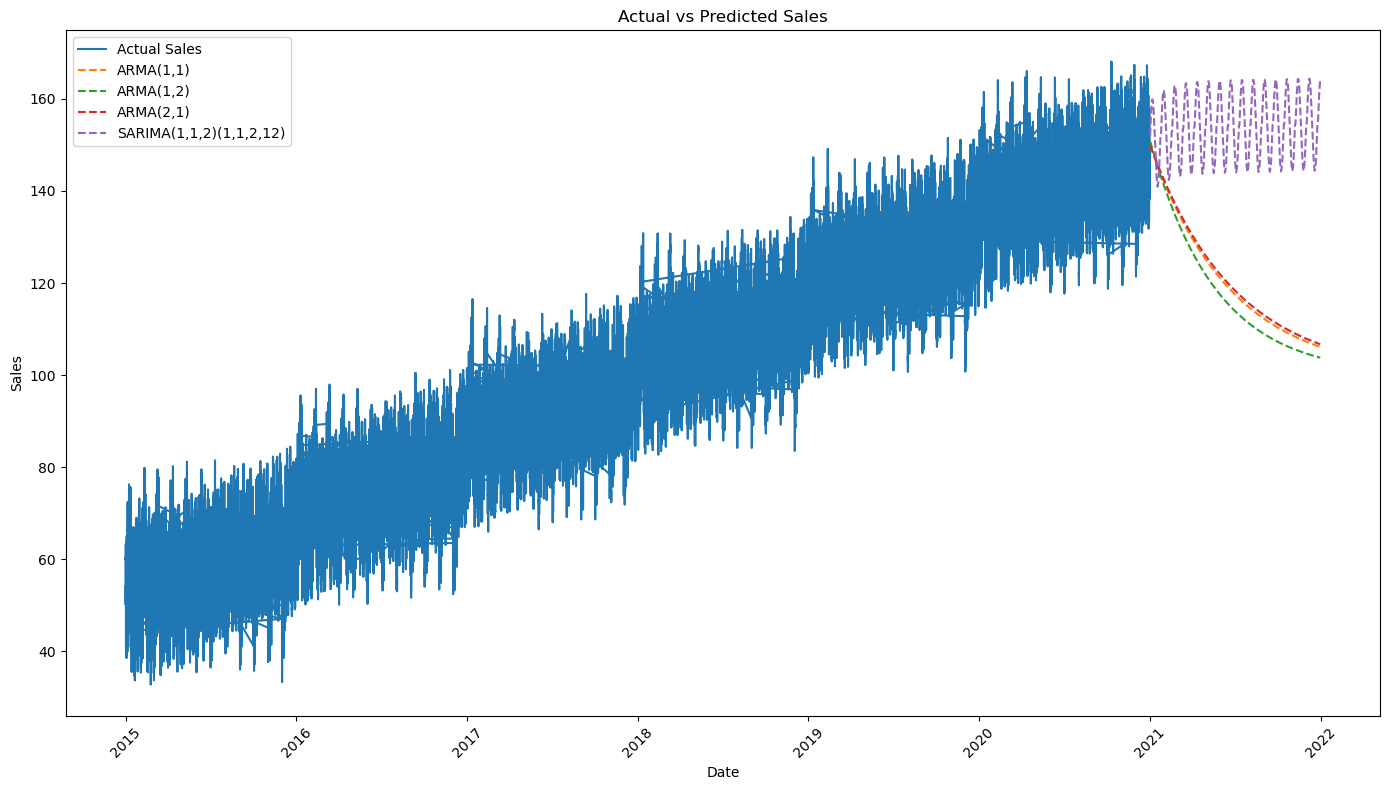

In [ ]:
# Forecast the next 365 days
forecast_period = 365
forecast_arma_1_1 = result_arma_1_1.forecast(steps=forecast_period)
forecast_arma_1_2 = result_arma_1_2.forecast(steps=forecast_period)
forecast_arma_2_1 = result_arma_2_1.forecast(steps=forecast_period)
forecast_sarima = result_sarima.forecast(steps=forecast_period)

# Generate date range for the forecast
last_date = data.index[-1]
forecast_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_period+1)]
forecast_dates = pd.to_datetime(forecast_dates)

# Create DataFrame for forecasts
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'ARMA(1,1)': forecast_arma_1_1,
    'ARMA(1,2)': forecast_arma_1_2,
    'ARMA(2,1)': forecast_arma_2_1,
    'SARIMA(1,1,2)(1,1,2,12)': forecast_sarima
})
forecast_df.set_index('Date', inplace=True)

# Plot actual sales data
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Sales'], label='Actual Sales')

# Plot forecasted sales data
plt.plot(forecast_df.index, forecast_df['ARMA(1,1)'], label='ARMA(1,1)', linestyle='--')
plt.plot(forecast_df.index, forecast_df['ARMA(1,2)'], label='ARMA(1,2)', linestyle='--')
plt.plot(forecast_df.index, forecast_df['ARMA(2,1)'], label='ARMA(2,1)', linestyle='--')
plt.plot(forecast_df.index, forecast_df['SARIMA(1,1,2)(1,1,2,12)'], label='SARIMA(1,1,2)(1,1,2,12)', linestyle='--')

# Set plot title and labels
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



The plot displays actual sales data (blue line) alongside predictions from four different models: ARMA(1,1) (yellow), ARMA(1,2) (green), ARMA(2,1) (red), and SARIMA(1,1,2)(1,1,2,12) (purple). ***The SARIMA model predictions show a more realistic seasonal pattern that aligns better with the historical data's trends.***


***Using RNN, LSTM, and GRU for Sales Prediction:***
  1. RNN: Suitable for simpler sales data with **short-term dependencies**.
  2.  LSTM: Ideal for capturing **long-term dependencies and complex patterns** in sales data; recommended for robust forecasting.
  3.  GRU: Offers a balance between performance and computational efficiency; use when faster training is needed with similar effectiveness to LSTM.

In [ ]:
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False))
    model.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False))
    model.add(GRU(50, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Define models with updated configurations
input_shape = (n_steps, n_features)
lstm_model = build_lstm_model(input_shape)
gru_model = build_gru_model(input_shape)
rnn_model = build_rnn_model(input_shape)

# Train models
lstm_history = train_model(lstm_model, X_train, y_train, X_test, y_test)
gru_history = train_model(gru_model, X_train, y_train, X_test, y_test)
rnn_history = train_model(rnn_model, X_train, y_train, X_test, y_test)


Epoch 1/25
1314/1314 [==============================] - 10s 6ms/step - loss: 0.0015 - val_loss: 8.5113e-04
Epoch 2/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.8390e-04 - val_loss: 4.9292e-04
Epoch 3/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.7496e-04 - val_loss: 4.6685e-04
Epoch 4/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.7156e-04 - val_loss: 5.4953e-04
Epoch 5/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.6254e-04 - val_loss: 6.5001e-04
Epoch 6/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.5857e-04 - val_loss: 4.9957e-04
Epoch 7/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.6120e-04 - val_loss: 3.6420e-04
Epoch 8/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.5565e-04 - val_loss: 3.5411e-04
Epoch 9/25
1314/1314 [==============================] - 6s 5ms/step - loss: 3.5359e-04 - val_loss: 4.7106e-04
Epoch 10/25
1

In [ ]:
def make_predictions(model, input_data, future_steps):
    last_days = input_data[-n_steps:]
    last_days = last_days.reshape((1, n_steps, n_features))

    predictions = []
    for _ in tqdm(range(future_steps), desc="Predicting"):
        predicted_value = model.predict(last_days, verbose=0)
        predictions.append(predicted_value[0, 0])
        last_days = np.append(last_days[:, 1:, :], predicted_value.reshape(1, 1, n_features), axis=1)

    return np.array(predictions).reshape(-1, 1)
# predicting for 365 days
future_steps = 365 * 24  # Predicting the next year (assuming 365 days, 24 hours each day)
lstm_predictions = make_predictions(lstm_model, scaled_data, future_steps)
gru_predictions = make_predictions(gru_model, scaled_data, future_steps)
rnn_predictions = make_predictions(rnn_model, scaled_data, future_steps)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)


Predicting: 100%|██████████| 8760/8760 [08:38<00:00, 16.89it/s]


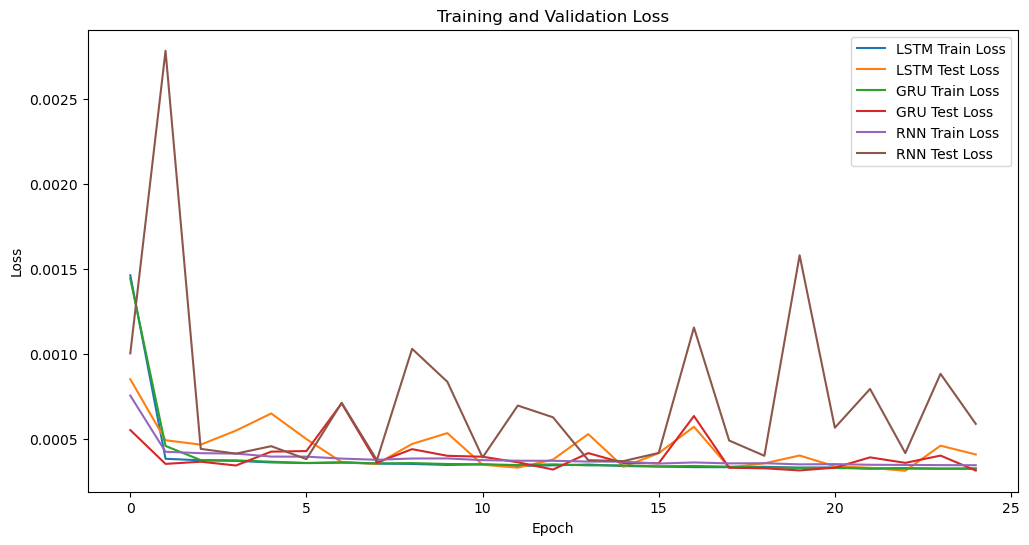

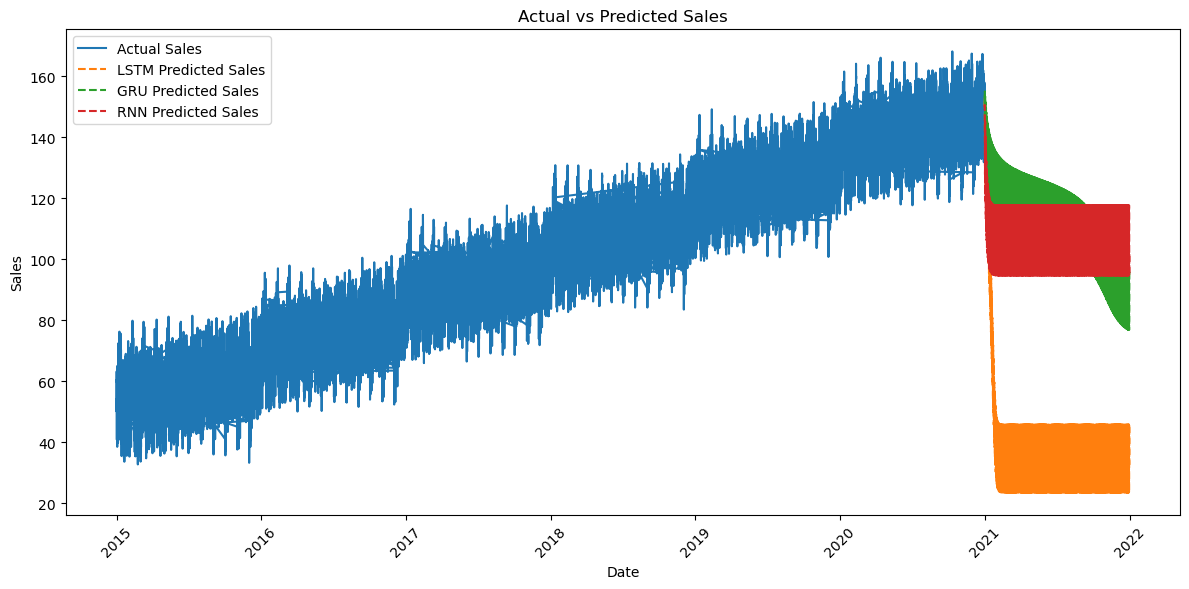

In [ ]:
# Generate future dates for plotting
future_dates = [data.index[-1] + pd.Timedelta(hours=i+1) for i in range(future_steps)]

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'LSTM': lstm_predictions.flatten(),
    'GRU': gru_predictions.flatten(),
    'RNN': rnn_predictions.flatten()
})

# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Test Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Test Loss')
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Test Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Actual Sales')
plt.plot(predictions_df['Date'], predictions_df['LSTM'], label='LSTM Predicted Sales', linestyle='--')
plt.plot(predictions_df['Date'], predictions_df['GRU'], label='GRU Predicted Sales', linestyle='--')
plt.plot(predictions_df['Date'], predictions_df['RNN'], label='RNN Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


-The training and validation loss plot shows that all models (LSTM, GRU, and RNN) converge well, with LSTM and GRU exhibiting more stability compared to RNN.
- However, the actual vs. predicted sales plot indicates that **none of the models accurately capture the sales trend post-2021**, suggesting ***overfitting or an inability to generalize on the test set***. Further tuning or incorporating or ensembling more features might improve these models' performance.

***Ensembling SARIMA and LSTM predictions with an 80% weight on SARIMA and 20% on LSTM combines the robustness of SARIMA's seasonal and trend capturing abilities with LSTM's capacity to model complex temporal patterns. This hybrid approach aims to enhance prediction accuracy by mitigating the limitations of each individual model.***

<ipython-input-1-d1c7456eb6f6>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/retail_sales.csv', parse_dates=['Date'], index_col='Date')


                         Sales
Date                          
2015-01-01 00:00:00  54.048619
2015-01-01 01:00:00  50.161596
2015-01-01 02:00:00  55.954939
2015-01-01 03:00:00  56.553261
2015-01-01 04:00:00  60.487874
Epoch 1/25
1314/1314 [==============================] - 13s 6ms/step - loss: 0.0015
Epoch 2/25
1314/1314 [==============================] - 8s 6ms/step - loss: 3.8995e-04
Epoch 3/25
1314/1314 [==============================] - 8s 6ms/step - loss: 3.8464e-04
Epoch 4/25
1314/1314 [==============================] - 8s 6ms/step - loss: 3.7345e-04
Epoch 5/25
1314/1314 [==============================] - 9s 7ms/step - loss: 3.6802e-04
Epoch 6/25
1314/1314 [==============================] - 7s 6ms/step - loss: 3.6106e-04
Epoch 7/25
1314/1314 [==============================] - 8s 6ms/step - loss: 3.5788e-04
Epoch 8/25
1314/1314 [==============================] - 8s 6ms/step - loss: 3.6335e-04
Epoch 9/25
1314/1314 [==============================] - 9s 7ms/step - loss: 3.5554e-04
Epo

Predicting: 100%|██████████| 8760/8760 [10:04<00:00, 14.49it/s]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

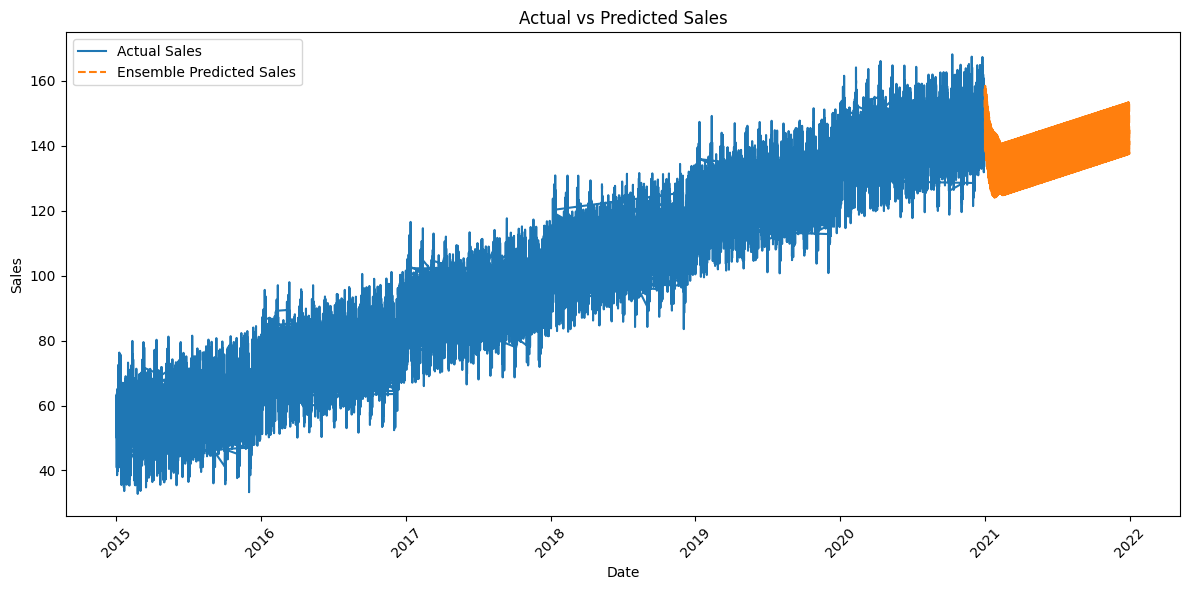

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
import tensorflow as tf
import statsmodels.api as sm
from datetime import timedelta

# Load data
data = pd.read_csv('retail_sales.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows to understand the data structure
print(data.head())

# Normalize the dataset (excluding the 'Date' column) for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Sales']])

# Define time steps and features for LSTM
n_steps = 24
n_features = 1

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Generate X and y for LSTM
X, y = create_dataset(scaled_data, n_steps)

# Reshape input to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], n_features)

# Split into train and test sets for LSTM
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model ensuring it meets cuDNN criteria
model = Sequential()
model.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=25, verbose=1)

# Predicting the next year (assuming 365 days, 24 hours each day)
future_steps = 365*24
last_days = scaled_data[-n_steps:]
last_days = last_days.reshape((1, n_steps, n_features))

predictions = []
for _ in tqdm(range(future_steps), desc="Predicting"):
    predicted_value = model.predict(last_days, verbose=0)
    predictions.append(predicted_value[0, 0])
    last_days = np.append(last_days[:, 1:, :], predicted_value.reshape(1, 1, n_features), axis=1)

# Convert predictions to a DataFrame
lstm_predictions = np.array(predictions).reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Predicting the next year (assuming 365 days, 24 hours each day)
future_steps = 365*24
last_days = scaled_data[-n_steps:]
last_days = last_days.reshape((1, n_steps, n_features))

predictions = []
for _ in tqdm(range(future_steps), desc="Predicting"):
    predicted_value = model.predict(last_days, verbose=0)
    predictions.append(predicted_value[0, 0])
    last_days = np.append(last_days[:, 1:, :], predicted_value.reshape(1, 1, n_features), axis=1)

# Convert predictions to a DataFrame
lstm_predictions = np.array(predictions).reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Train SARIMA model (example with arbitrary parameters)
sarima_model = sm.tsa.statespace.SARIMAX(data['Sales'], order=(1, 1, 2), seasonal_order=(1, 1, 2, 12))
sarima_result = sarima_model.fit()

# Forecast the same number of steps as the LSTM model
sarima_forecast = sarima_result.get_forecast(steps=future_steps)
sarima_predictions = sarima_forecast.predicted_mean

# Ensure the predictions have the same length
min_length = min(len(sarima_predictions), len(lstm_predictions))
sarima_predictions = sarima_predictions[:min_length].values  # Convert to numpy array
lstm_predictions = lstm_predictions[:min_length].flatten()   # Flatten the LSTM predictions

# Combine SARIMA and LSTM predictions
ensemble_predictions = 0.8 * sarima_predictions + 0.2  * lstm_predictions

# Create DataFrame for ensemble predictions
future_dates = [data.index[-1] + pd.Timedelta(hours=i+1) for i in range(min_length)]
ensemble_df = pd.DataFrame({'Date': future_dates, 'SARIMA': sarima_predictions, 'LSTM': lstm_predictions, 'Ensemble': ensemble_predictions})

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Actual Sales')
plt.plot(ensemble_df['Date'], ensemble_df['Ensemble'], label='Ensemble Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 The blending of the two models aims to leverage the strengths of both, potentially leading to more accurate future sales forecasts.
 Ensembling in ratio of
 1. 80% sarima_predictions + 20%   * lstm_predictions
 2. 90%  * sarima_predictions + 10%   * lstm_predictions
 3. 100% * sarima_predictions + 0%   * lstm_predictions

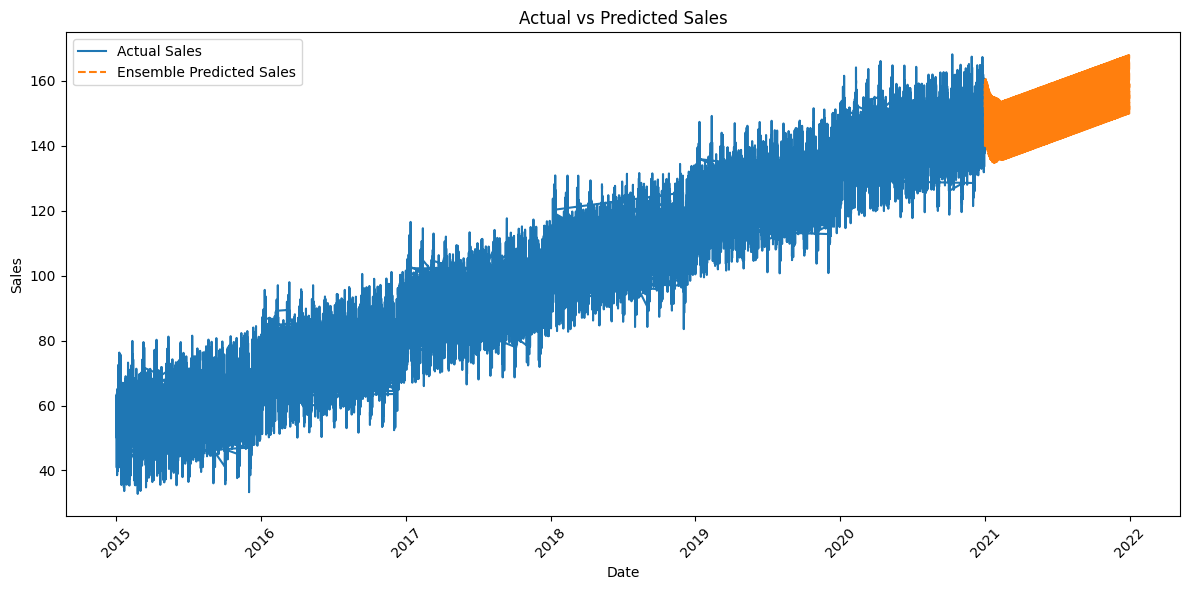

In [ ]:
ensemble_predictions = 0.9 * sarima_predictions + 0.1  * lstm_predictions

# Create DataFrame for ensemble predictions
future_dates = [data.index[-1] + pd.Timedelta(hours=i+1) for i in range(min_length)]
ensemble_df = pd.DataFrame({'Date': future_dates, 'SARIMA': sarima_predictions, 'LSTM': lstm_predictions, 'Ensemble': ensemble_predictions})

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Actual Sales')
plt.plot(ensemble_df['Date'], ensemble_df['Ensemble'], label='Ensemble Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



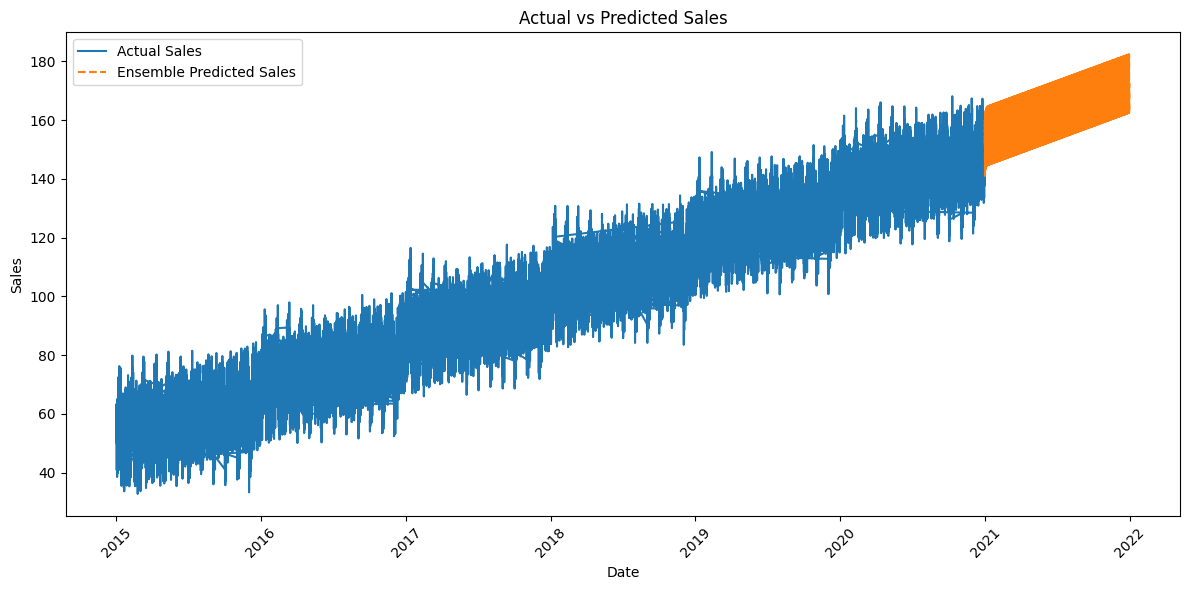

In [ ]:
ensemble_predictions = 1* sarima_predictions + 0  * lstm_predictions

# Create DataFrame for ensemble predictions
future_dates = [data.index[-1] + pd.Timedelta(hours=i+1) for i in range(min_length)]
ensemble_df = pd.DataFrame({'Date': future_dates, 'SARIMA': sarima_predictions, 'LSTM': lstm_predictions, 'Ensemble': ensemble_predictions})

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Actual Sales')
plt.plot(ensemble_df['Date'], ensemble_df['Ensemble'], label='Ensemble Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

